### 1. Import Libraries

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import normalize, StandardScaler


In [27]:
#set path
path = r'C:\Users\beatr\Documents\27_06_2023-Boat_Marketing'

In [28]:
#import data set
df_boats = pd.read_pickle(os.path.join(path, '02-Data', 'Prepared', 'Boats_Explored.pkl'))

In [29]:
#check columns
df_boats.columns

Index(['boat_type', 'manufacturer', 'type', 'year_built', 'length', 'width',
       'material', 'views_last_7_days', 'currency', 'value', 'value_in_eur',
       'country', 'Price category', 'Popularity', 'Boat_age'],
      dtype='object')

In [30]:
#check shape of data
df_boats.shape

(9192, 15)

In [31]:
df_boats.head(5)

,boat_type,manufacturer,type,year_built,length,width,material,views_last_7_days,currency,value,value_in_eur,country,Price category,Popularity,Boat_age
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,unknown,226,CHF,3337,3337.0,Switzerland,Low price,Very popular,Relatively old boat
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,EUR,3490,3490.0,Germany,Low price,More popular,New boat
2,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,unknown,64,DKK,25900,3367.0,Denmark,Low price,Not that popular,New boat
3,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,EUR,3399,3399.0,Germany,Low price,Not that popular,New boat
4,Catamaran,unknown,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,474,CHF,3600,3600.0,Switzerland,Low price,Very popular,Old boat


### 2. Data Manipulation
- 1. Select numeric variables

In [32]:
df_sub = df_boats[[ 'year_built', 'length', 'width', 'views_last_7_days', 'value_in_eur']]

In [33]:
df_sub.head()

,year_built,length,width,views_last_7_days,value_in_eur
0,2017,4.00,1.90,226,3337.0
1,2020,4.00,1.50,75,3490.0
2,2020,3.00,1.00,64,3367.0
3,2019,3.55,1.46,58,3399.0
4,1999,6.20,2.38,474,3600.0


In [34]:
df_sub.dtypes

year_built             int64
length               float64
width                float64
views_last_7_days      int64
value_in_eur         float64
dtype: object

In [35]:
#Recheck for null values
value = df_sub.isnull().values.any()
value

False

#### Standardize Data
- Normalize data

In [36]:
# Define the scaler
#scaler = StandardScaler()

In [37]:
# transform data
#df_sub = scaler.fit_transform(df_sub)

### 3. Elbow technique

In [38]:
# Defines the range of potential clusters in the data.
num_cl = range(1, 10)

# Defines k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters = i) for i in num_cl] 

In [39]:
# Creates a score that represents 
# a rate of variation for the given cluster option.
score = [kmeans[i].fit(df_sub).score(df_sub) for i in range(len(kmeans))] 


score

C:\Users\beatr\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\beatr\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\beatr\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\beatr\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-8004063454161735.0,
 -3349598041632895.0,
 -1900825907358158.8,
 -1077210762439792.9,
 -740333458226608.9,
 -506349005403066.0,
 -358447482435845.2,
 -267590007329311.06,
 -206962855257241.84]

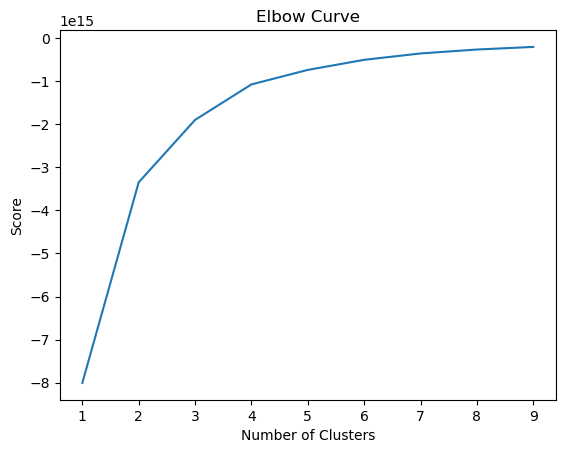

In [40]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### 4. Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart
- I choose 3 clusters as the curve has a sharp kink in the curve. The line curves hits and equilibrium point.

### 5. Run the k-means algorithm.

In [41]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [42]:
# Fit the k-means object to the data.

kmeans.fit(df_sub)

C:\Users\beatr\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [43]:
df_sub['clusters'] =kmeans.fit_predict(df_sub)

C:\Users\beatr\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\beatr\AppData\Local\Temp\ipykernel_9776\2743636067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['clusters'] =kmeans.fit_predict(df_sub)


In [44]:
df_sub['clusters'].value_counts()

0    9028
1     151
2      13
Name: clusters, dtype: int64

In [45]:
df_sub.columns

Index(['year_built', 'length', 'width', 'views_last_7_days', 'value_in_eur',
       'clusters'],
      dtype='object')

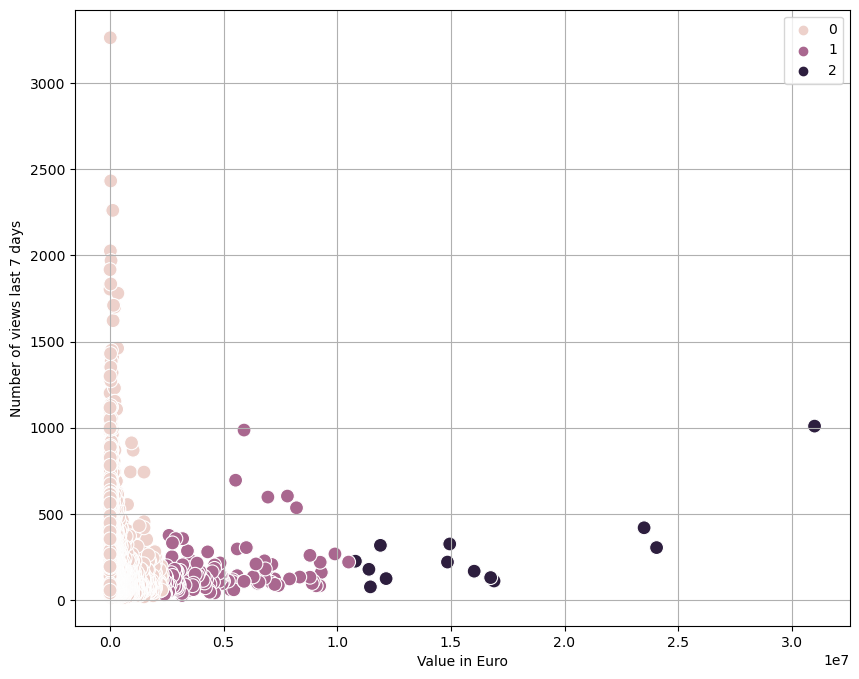

In [46]:
#Plot for the number of views and price of the boat

plt.figure(figsize=(10,8))
Scatter_1 = sns.scatterplot(x = df_sub['value_in_eur'], y = df_sub['views_last_7_days'], hue = kmeans.labels_, s=100)

Scatter_1.grid(True)
plt.xlabel('Value in Euro')
plt.ylabel('Number of views last 7 days')
plt.show()

- The lower the price the more views the boat has

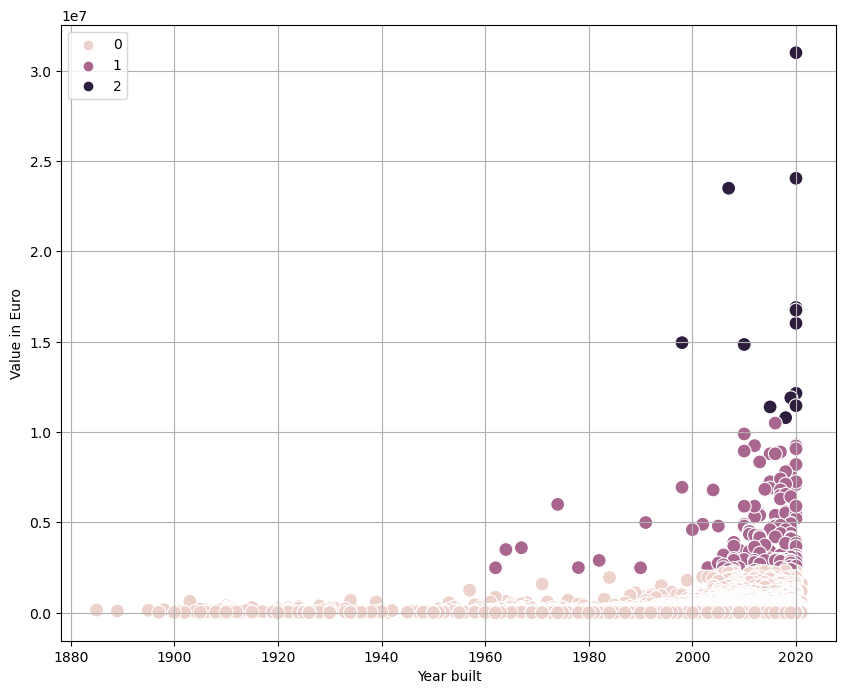

In [47]:
#Plot for the year built with price of boat

plt.figure(figsize=(10,8))
Scatter_2 = sns.scatterplot(x = df_sub['year_built'], y = df_sub['value_in_eur'], hue = kmeans.labels_, s=100)

Scatter_2.grid(True)
plt.xlabel('Year built')
plt.ylabel('Value in Euro')
plt.show()

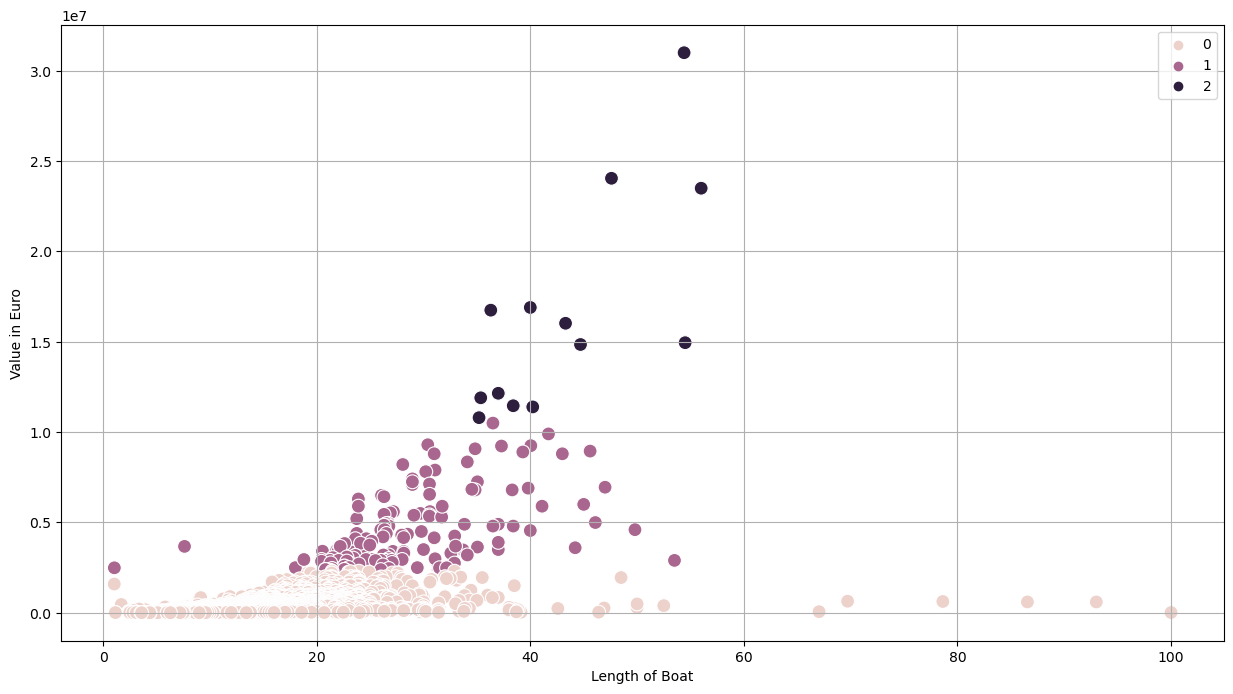

In [48]:
#Plot for the length of the boat with price of boat

plt.figure(figsize=(15,8))
Scatter_3 = sns.scatterplot(x = df_sub['length'], y = df_sub['value_in_eur'], hue = kmeans.labels_, s=100)

Scatter_3.grid(True)
plt.xlabel('Length of Boat')
plt.ylabel('Value in Euro')
plt.show()

- The longer the boat the higher the price

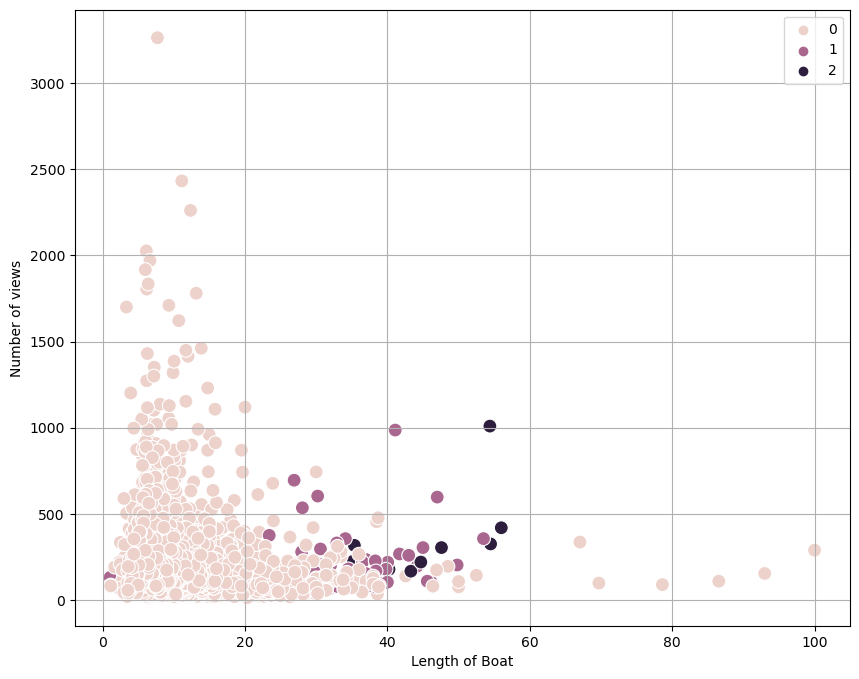

In [49]:
#Plot for the length of the boat with price of boat

plt.figure(figsize=(10,8))
Scatter_4 = sns.scatterplot(x = df_sub['length'], y = df_sub['views_last_7_days'], hue = kmeans.labels_, s=100)

Scatter_4.grid(True)
plt.xlabel('Length of Boat')
plt.ylabel('Number of views')
plt.show()

- The shorter the boat the more views.
- We see a cluster above 60-100 that are also viewed a lot.
- The on the right where ships are quite large. Is an area that is not as clear. But we can guess that these are comercial ships as they are very large.

### 9. Descriptive statistics

In [50]:
df_sub.columns

Index(['year_built', 'length', 'width', 'views_last_7_days', 'value_in_eur',
       'clusters'],
      dtype='object')

In [51]:
# Use group by to calculate statistics of clusters
df_sub.groupby('clusters').agg({'year_built':['mean', 'median'], 
                         'length':['mean', 'median'], 
                         'views_last_7_days':['mean', 'median'],
                          'value_in_eur':['mean', 'median']})

year_built             length        views_last_7_days         \
                 mean  median       mean median              mean median   
clusters                                                                   
0         2004.797297  2008.0  11.408947  10.40        147.554719  107.0   
1         2012.589404  2016.0  28.740993  27.00        148.225166  113.0   
2         2015.923077  2020.0  43.306923  40.23        277.230769  220.0   

          value_in_eur              
                  mean      median  
clusters                            
0         2.093118e+05     93000.0  
1         4.428750e+06   3690000.0  
2         1.659456e+07  14950000.0

#### Discussion:
The findings are clear and useful. The clustering suggests that smaller more afordable boats have the least views.
Additionally, relatively new boats that are longer are viewed a little more and are a lot more expensive. Lastly, large boats are small ships that are new have the most views and are a lot more expensive.

#### Suggestions:
Compare these findings with catogorical variables. Which engine does the boats and ships in questions have. Who is the manufacturers of these boats. From which material are these ships built.

In [53]:
Scatter_1.figure.savefig(os.path.join(path, '03-Analysis','Visualizations', 'Value_vs_Views.png'))
Scatter_2.figure.savefig(os.path.join(path, '03-Analysis','Visualizations', 'Age_vs_Value.png'))
Scatter_3.figure.savefig(os.path.join(path, '03-Analysis','Visualizations', 'Length_vs_Value.png'))
Scatter_4.figure.savefig(os.path.join(path, '03-Analysis','Visualizations', 'Length_vs_Views.png'))

In [54]:
df_boats.head()

,boat_type,manufacturer,type,year_built,length,width,material,views_last_7_days,currency,value,value_in_eur,country,Price category,Popularity,Boat_age
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,unknown,226,CHF,3337,3337.0,Switzerland,Low price,Very popular,Relatively old boat
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,EUR,3490,3490.0,Germany,Low price,More popular,New boat
2,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,unknown,64,DKK,25900,3367.0,Denmark,Low price,Not that popular,New boat
3,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,EUR,3399,3399.0,Germany,Low price,Not that popular,New boat
4,Catamaran,unknown,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,474,CHF,3600,3600.0,Switzerland,Low price,Very popular,Old boat


In [55]:
df_sub.head()

,year_built,length,width,views_last_7_days,value_in_eur,clusters
0,2017,4.00,1.90,226,3337.0,0
1,2020,4.00,1.50,75,3490.0,0
2,2020,3.00,1.00,64,3367.0,0
3,2019,3.55,1.46,58,3399.0,0
4,1999,6.20,2.38,474,3600.0,0
